# Public Schools SAT Scores

## This analysis answers the following questions:
 What are the top 10 best schools in the city by math/reading/writing and by the total SAT score?

In [117]:
# importing neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
# reading .csv file
schools = pd.read_csv("schools.csv")

Data Cleaning:

In [91]:
# Dropping Nulls
schools.dropna(inplace=True)

Adding a column of total SAT scores for all 3 parts

In [160]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

In order to see whether the sample is representative, let's count the number of borough's appearing the dataset. Staten Island appears only 9 times, which does not follow the principle that the sample should be bigger than 30. That means that it can  excluded from the boroughs:

In [116]:
schools["borough"].value_counts()


borough
Brooklyn         104
Bronx             93
Manhattan         84
Queens            65
Staten Island      9
Name: count, dtype: int64

In [145]:
schools = schools[schools["borough"] != "Staten Island"]

## Math Scores
Firstly, the math test scores will be examined.

In [146]:
schools_math = schools[["school_name", "borough", "average_math", "percent_tested"]]
schools_math_avg = schools_math.groupby('borough')[["average_math"]].mean().round(2).sort_values(by="average_math", ascending=False).reset_index()
overall_avg_score_math = schools_math_avg["average_math"].mean()
schools_math_avg

,borough,average_math
0,Queens,462.36
1,Manhattan,455.89
2,Brooklyn,416.40
3,Bronx,404.36


In [147]:
total_math = schools_math.groupby("borough")["average_math"].agg(["count", "mean", "median", "std"]).round(2).reset_index()
total_math_sorted = total_math.sort_values(by='count', ascending=True)
total_math

,borough,count,mean,median,std
0,Bronx,98,404.36,395.5,52.22
1,Brooklyn,109,416.40,395.0,60.48
2,Manhattan,89,455.89,433.0,83.82
3,Queens,69,462.36,448.0,71.89


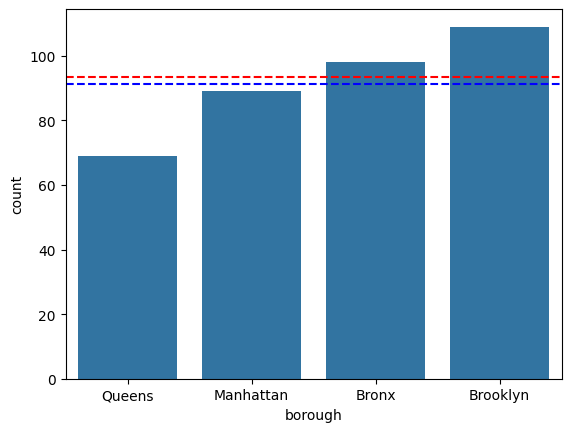

In [148]:
sns.barplot(data=total_math_sorted, x='borough', y='count')
avg_line_count_math = total_math['count'].mean()
mid_line_count_math = total_math['count'].median()

plt.axhline(y=avg_line_count_math , color='b', linestyle='--', label='Overall Average')
plt.axhline(y=mid_line_count_math , color='r', linestyle='--', label='Overall Average')

<Axes: xlabel='borough', ylabel='average_math'>

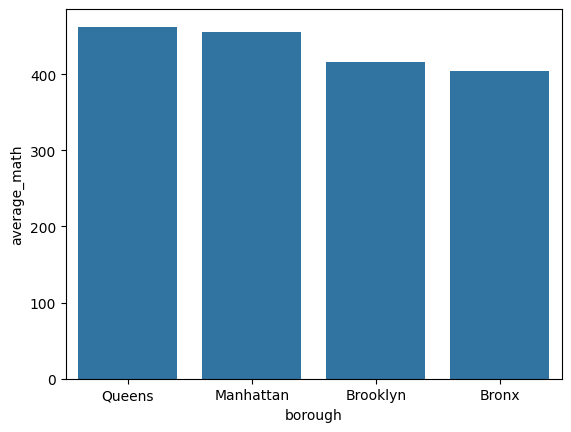

In [149]:
sns.barplot(data=schools_math_avg, x="borough", y="average_math")

Top 5 best schools math SAT score:

In [150]:
top_10_schools_math = schools_math.groupby("school_name", as_index=False)[["school_name", "average_math"]].head(5)
top_10_schools_math.head(5)

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657
1,Essex Street Academy,395
2,Lower Manhattan Arts Academy,418
3,High School for Dual Language and Asian Studies,613
4,Henry Street School for International Studies,410


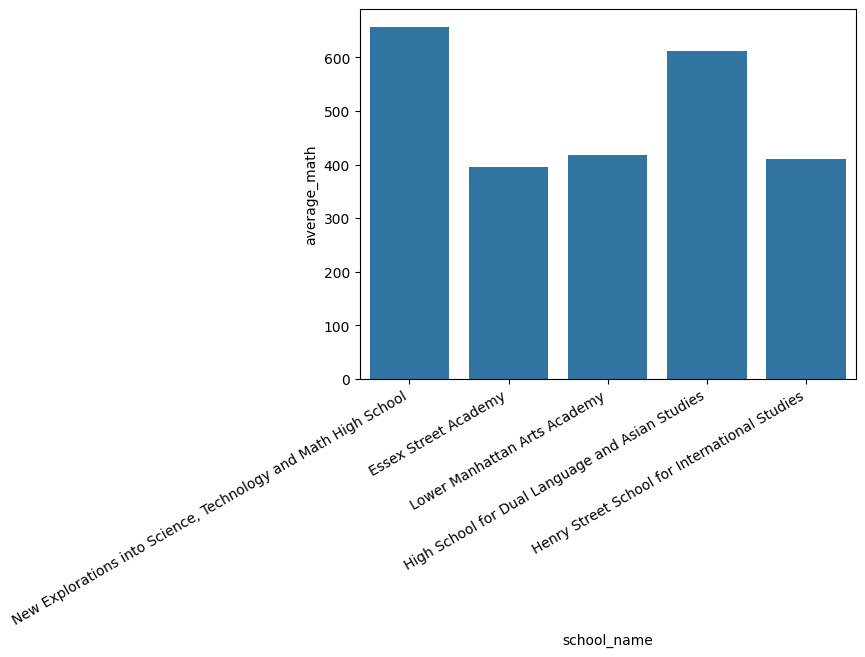

In [151]:
sns.barplot(data=top_10_schools_math.head(), x="school_name", y="average_math")
plt.xticks(rotation=30, ha="right")
plt.show()

## Reading Scores

In [152]:
schools_reading = schools[["school_name", "borough", "average_reading", "percent_tested"]]
schools_reading_avg = schools_reading.groupby('borough')[["average_reading", "percent_tested"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_reading_avg["average_reading"].mean()
schools_reading_avg

,borough,average_reading,percent_tested
0,Bronx,402.52,58.65
1,Brooklyn,410.76,62.64
2,Manhattan,444.93,71.39
3,Queens,443.26,69.31


<Axes: xlabel='borough', ylabel='average_reading'>

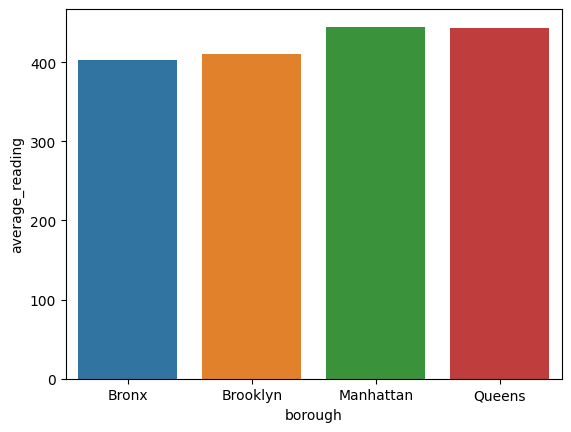

In [153]:
colors = ['red' if borough == 'Staten Island' else 'green' if borough == 'Queens' else 'blue' for borough in schools_math_avg['borough']]
sns.barplot(data=schools_reading_avg, x="borough", y="average_reading", hue="borough", legend=False)

In [154]:
top_10_schools_reading = schools_reading.groupby("school_name", as_index=False)[["school_name", "average_reading"]].head(5)
top_10_schools_reading.head(5)

,school_name,average_reading
0,"New Explorations into Science, Technology and ...",601
1,Essex Street Academy,411
2,Lower Manhattan Arts Academy,428
3,High School for Dual Language and Asian Studies,453
4,Henry Street School for International Studies,406


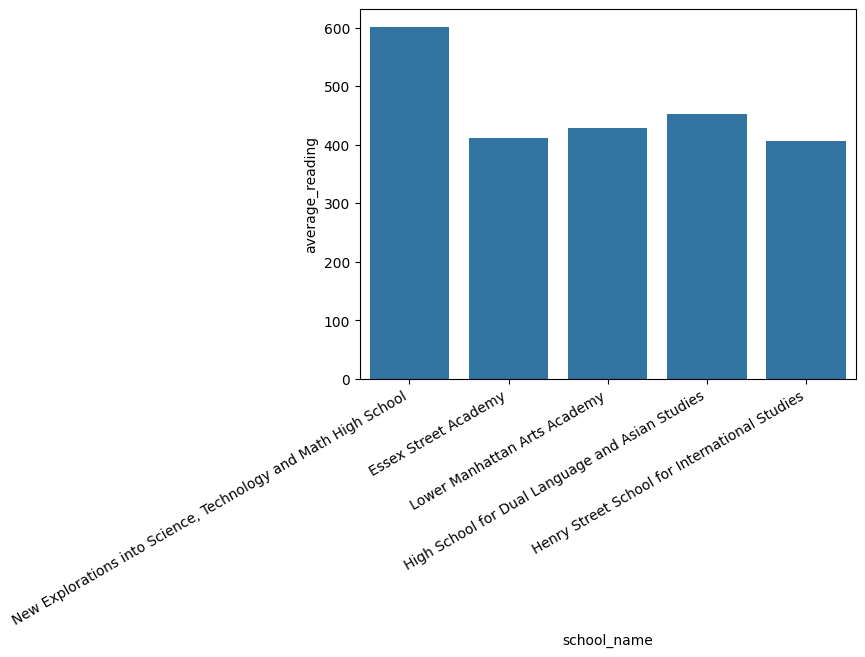

In [155]:
sns.barplot(data=top_10_schools_reading.head(), x="school_name", y="average_reading")
plt.xticks(rotation=30, ha="right")
plt.show()

## Writing Scores

In [80]:
schools_writing = schools[["school_name", "borough", "average_writing", "percent_tested"]]
schools_writing_avg = schools_writing.groupby('borough')[["average_writing", "percent_tested"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_writing_avg["average_writing"].mean()
schools_writing_avg

,borough,average_writing,percent_tested
0,Bronx,397.61,58.65
1,Brooklyn,403.85,62.64
2,Manhattan,438.92,71.39
3,Queens,440.63,69.31
4,Staten Island,474.11,66.11


<Axes: xlabel='borough', ylabel='average_writing'>

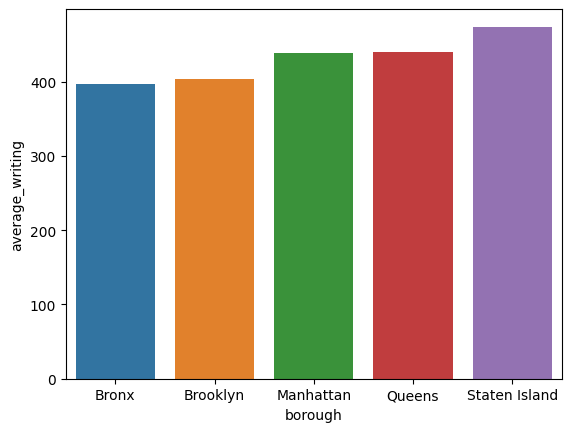

In [83]:
sns.barplot(data=schools_writing_avg, x="borough", y="average_writing", hue="borough", legend=False)

In [156]:
top_10_schools_writing = schools_writing.groupby("school_name", as_index=False)[["school_name", "average_writing"]].head(5)
top_10_schools_writing.head(5)

,school_name,average_writing
1,Essex Street Academy,387
2,Lower Manhattan Arts Academy,415
3,High School for Dual Language and Asian Studies,463
4,Henry Street School for International Studies,381
5,Bard High School Early College,639


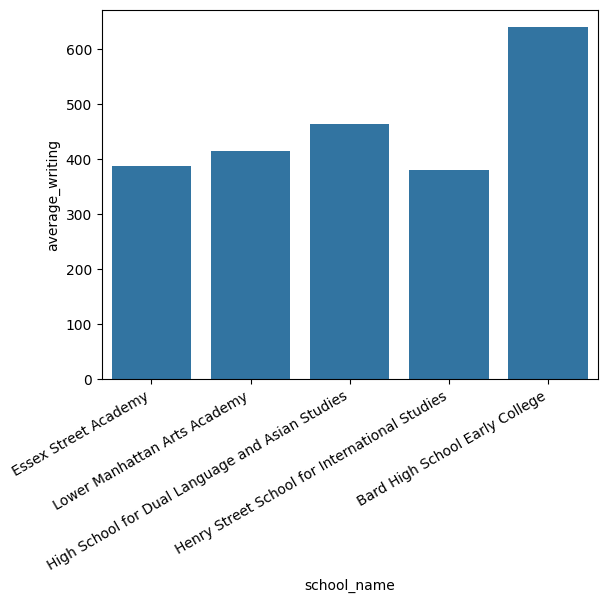

In [158]:
sns.barplot(data=top_10_schools_writing.head(), x="school_name", y="average_writing")
plt.xticks(rotation=30, ha="right")
plt.show()

## Total Scores

In [161]:
total_score = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "median"]).round(2)
total_score

,count,mean,median
borough,,,
Bronx,98,1202.72,1190.0
Brooklyn,109,1230.26,1186.0
Manhattan,89,1340.13,1284.0
Queens,69,1345.48,1290.0


<Axes: xlabel='borough', ylabel='mean'>

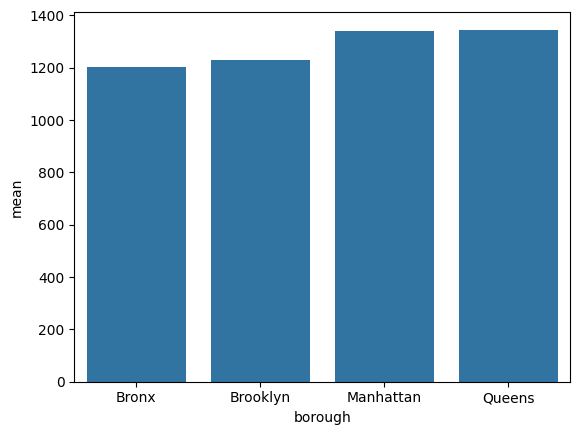

In [162]:
sns.barplot(data=total_score, x="borough", y="mean")